**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Arrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df = pd.read_csv("Arrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


**Getting to know the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Hopkins Test**

In [6]:
# !pip install pyclustertend

In [7]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [8]:
hopkins(scale(df), df.shape[0])

0.39120666777478763

**Kmeans Modelling**

In [9]:
from sklearn.cluster import KMeans

In [10]:
k_means = KMeans(n_clusters = 2, random_state =42)

In [11]:
k_means.fit(df)

KMeans(n_clusters=2, random_state=42)

In [12]:
clusters = k_means.labels_

In [13]:
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

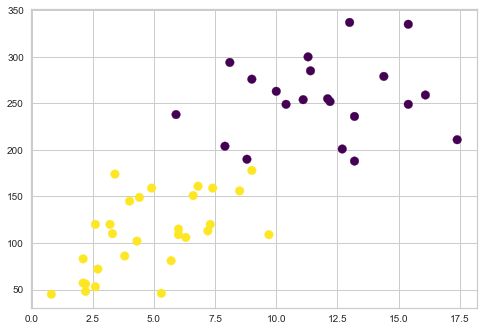

In [68]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 75, cmap = "viridis");

In [15]:
centroids = k_means.cluster_centers_

In [70]:
centroids

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

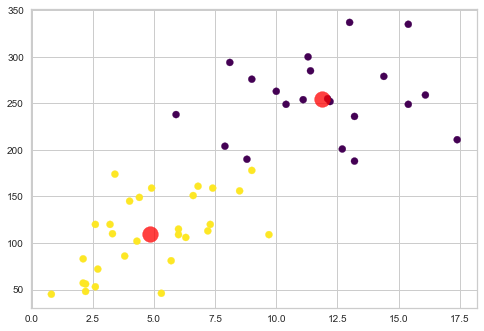

In [76]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "red", s = 250, alpha=0.75);

**Elbow Method**

In [97]:
rate = []

K = range(2,10)

for i in K:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    rate.append(kmeans.inertia_)

In [99]:
rate

[96459.09382594418,
 47984.26535714285,
 34728.629357142854,
 24417.023523809527,
 18768.000666666667,
 15463.473777777775,
 13329.361976190476,
 11125.03380952381]

Text(0.5, 1.0, 'Elbow')

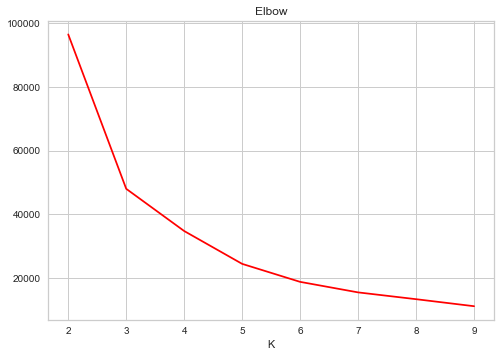

In [98]:
plt.plot(K, rate, "red")
plt.xlabel("K")
plt.title("Elbow")

In [20]:
from yellowbrick.cluster import KElbowVisualizer

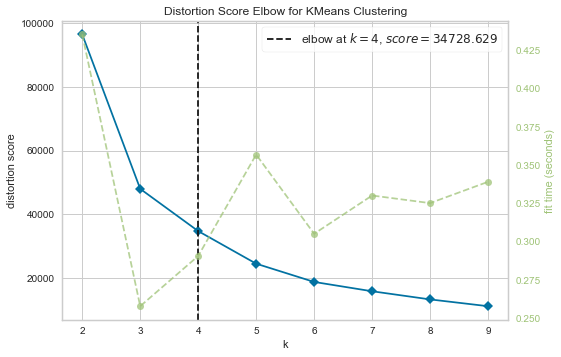

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
kmeans_yellowbrick = KMeans()
graph = KElbowVisualizer(kmeans_yellowbrick, k = (2,10))
graph.fit(df)
graph.poof()

In [109]:
new_kmeans = KMeans(n_clusters = 4, random_state = 42)

In [110]:
new_kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [111]:
labels = new_kmeans.labels_

In [112]:
labels

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0])

In [113]:
df["cluster_id"] = labels

In [114]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


**Silhouette Score**

In [115]:
from sklearn.metrics import silhouette_score

In [116]:
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.5014799771920441


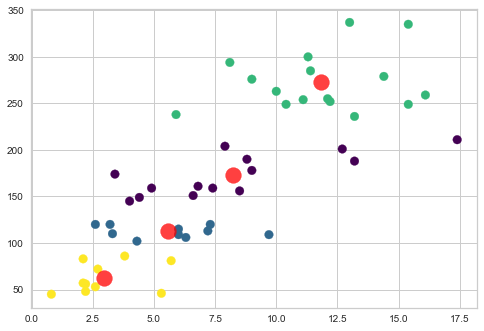

In [119]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 75, cmap = "viridis")
plt.scatter(new_kmeans.cluster_centers_[:, 0], new_kmeans.cluster_centers_[:, 1], s=250, c='red',alpha=0.75)

**ARI Score**

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [121]:
new_df = df.sample(15, random_state = 42)
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id
Indiana,7.2,113,65,21.0,1
South Carolina,14.4,279,48,22.5,2
New Mexico,11.4,285,70,32.1,2
Virginia,8.5,156,63,20.7,0
Louisiana,15.4,249,66,22.2,2
Wisconsin,2.6,53,66,10.8,3
Nebraska,4.3,102,62,16.5,1
Montana,6.0,109,53,16.4,1
North Carolina,13.0,337,45,16.1,2
Maryland,11.3,300,67,27.8,2


In [129]:
new_df["true_label"] = [1, 2, 3, 0, 2, 2, 1, 3, 2, 0, 2, 1, 1, 2, 3]

In [130]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
Indiana,7.2,113,65,21.0,1,1
South Carolina,14.4,279,48,22.5,2,2
New Mexico,11.4,285,70,32.1,2,3
Virginia,8.5,156,63,20.7,0,0
Louisiana,15.4,249,66,22.2,2,2
Wisconsin,2.6,53,66,10.8,3,2
Nebraska,4.3,102,62,16.5,1,1
Montana,6.0,109,53,16.4,1,3
North Carolina,13.0,337,45,16.1,2,2
Maryland,11.3,300,67,27.8,2,0


In [131]:
adjusted_rand_score(new_df["true_label"],new_df["cluster_id"])

0.2153846153846154